<h1>Author: Mushaf Bashir</h1>

<p style="display: flex; gap: 10px; flex-wrap: wrap;">
  <a href="https://github.com/MushafBashir" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-000000?style=for-the-badge&logo=github&logoColor=white"/>
  </a>

  <a href="https://www.linkedin.com/in/mushaf-bashir-701006308/" target="_blank">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
  </a>

  <a href="mailto:mushafbashir@gmail.com">
    <img src="https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white"/>
  </a>

  <a href="https://www.kaggle.com/mushafbashir" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white"/>
  </a>
</p>


<h1>FIFA WC 2022: Argentina Victory</h1>

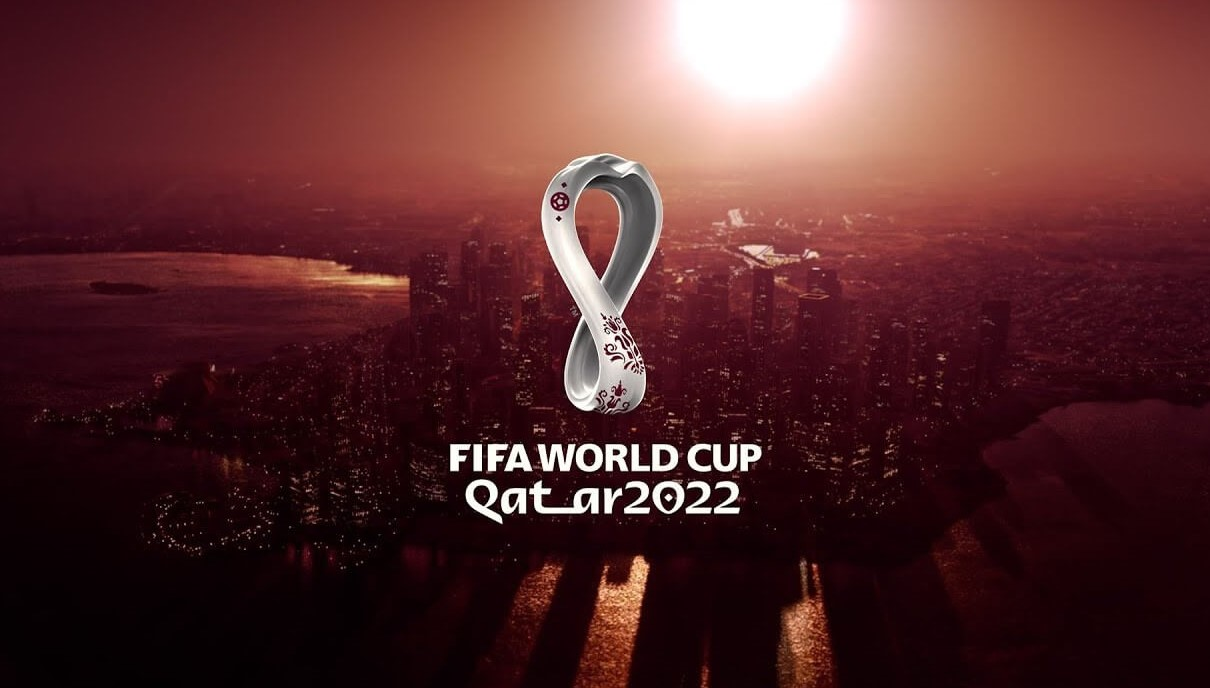

In [1]:
from IPython.display import Image
display(Image(filename="banner.jpg"))

The FIFA World Cup 2022 was the 22nd edition of the tournament. In this edition, 32 teams participated. For the first time in FIFA World Cup history, the tournament was hosted by a Middle Eastern country, Qatar. All 64 matches were played across 8 venues in 5 cities. This tournament was marked by several notable events and surprises. For the first time, a Middle Eastern team, Morocco, reached the semi-finals. Additionally, Saudi Arabia defeated Argentina, which had won the World Cup twice before, and ultimately won the tournament. There are many aspects of this tournament that we will explore and analyze in the Exploratory Data Analysis.

The Dataset is taken from the [source](https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics) from Kaggle which was uploaded by SWAPTR.

There are two datasets. One is about the performance of teams within the Groups. Other Dataset describes each information of specific team throughout the tournament.

### In this Exploratory Data Analysis, we will find the following from Group Data:

**Team with Most Wins:** Identify the team that won the most matches.

**Team with Most Goals Scored:** Find out which team scored the highest number of goals.

**Team with No Wins:** Determine which team failed to win a single match.

**Team with Most Goals Conceded:** Identify which team allowed the most goals against them.

**Team with Highest Goal Difference:** Calculate which team has the highest goal difference (goals scored minus goals conceded).

**Highest Points in Group Stage:** Find out which team accumulated the most points in the group stage.

**Teams Qualifying for Round of 16:** Determine which teams advanced to the Round of 16 based on their group performance.

#### Let's jump into Dataset.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
group_data = pd.read_csv('group_stats.csv')


group_data.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,3,1,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,4,2,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97


In [4]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32 non-null     int64  
 1   group                       32 non-null     int64  
 2   rank                        32 non-null     int64  
 3   team                        32 non-null     object 
 4   matches_played              32 non-null     int64  
 5   wins                        32 non-null     int64  
 6   draws                       32 non-null     int64  
 7   losses                      32 non-null     int64  
 8   goals_scored                32 non-null     int64  
 9   goals_against               32 non-null     int64  
 10  goal_difference             32 non-null     int64  
 11  points                      32 non-null     int64  
 12  expected_goal_scored        32 non-null     float64
 13  exp_goal_conceded           32 non-nu

In Group Stage Dataset there are **32 rows** and **16 columns**. And there is no missing values in this dataset.

In [5]:
group_data.head(3)

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39


In [6]:
# Droping Column 
group_data = group_data.drop('Unnamed: 0', axis=1)

# Changing Column values for more ease
new_value_group = {
    1 : 'A',
    2 : 'B',
    3 : 'C',
    4 : 'D',
    5 : 'E',
    6 : 'F',
    7 : 'G',
    8 : 'H',
}

group_data['group'] = group_data['group'].replace(new_value_group)

In [7]:
group_data.head(3)

,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,A,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,A,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,A,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39


I have removed one column named 'Unnamed : 0' as it is only showing indexes of each row.
I have also changed value of column group from numeric to categorical as it is showing the name of groups.

Now there are **15 Columns** and **32 Rows**

In [8]:
team_won = group_data[group_data['wins']== 2]['team']

print("Following are the teams that won maximum matches in group stage:")
for team_won in team_won:
    print(team_won, "=", 2)

Following are the teams that won maximum matches in group stage:
Netherlands = 2
Senegal = 2
England = 2
Argentina = 2
France = 2
Australia = 2
Japan = 2
Morocco = 2
Brazil = 2
Switzerland = 2
Portugal = 2


In the group stage of the FIFA World Cup 2022, each team played 3 matches. What’s interesting is that no team was able to win all 3 matches, showing how close and tough the competition was.

In [9]:
most_goals = group_data['goals_scored'].max()
most_goals

most_goals_team = group_data[group_data['goals_scored'] == most_goals]['team']
print('Following are the teams that scored maximum goals in group stage: ');
for team in most_goals_team:
    print(team , "=", most_goals)

Following are the teams that scored maximum goals in group stage: 
England = 9
Spain = 9


In [10]:
not_won = group_data['wins'].min()

team_loss = group_data[group_data['wins'] == not_won]['team']
print('Following are the teams that not won a single game in group stage: ');
for team in team_loss:
    print(team , "=", 0)

Following are the teams that not won a single game in group stage: 
Qatar = 0
Wales = 0
Denmark = 0
Canada = 0
Serbia = 0


In [11]:
goal_against = group_data['goals_against'].max()

r = group_data[group_data['goals_against'] == goal_against][['team', 'goals_against']]

print('Following is the team that conceded more goals in group stage: ');
for index, row in r.iterrows():
    print(row['team'], '=', row['goals_against'])

Following is the team that conceded more goals in group stage: 
Costa Rica = 11


In [12]:
goal_difference = group_data['goal_difference'].max()

goal_difference_team = group_data[group_data['goal_difference'] == goal_difference]['team']

print('Following is the team that have highest goal difference in group stage: ');

for team in goal_difference_team:
    print(team, ":", goal_difference)

Following is the team that have highest goal difference in group stage: 
England : 7


England had a strong performance in the group stage, scoring the highest number of goals — 9 in total — while only conceding 2. This showed both their attacking power and solid defense.

In [13]:
highest_points = group_data['points'].max()

highest_points_teams = group_data[group_data['points'] == goal_difference]['team']

print('Following are the teams that have highest points in group stage: ');

for team in highest_points_teams:
    print(team, ":", highest_points)

Following are the teams that have highest points in group stage: 
Netherlands : 7
England : 7
Morocco : 7


In [14]:
qualified_teams = group_data.groupby('group')[['team', 'points']].head(2)

qualified_teams_list = qualified_teams.sort_values(by='points', ascending=False)

print('Following are the teams that qualified for Round of 16: ')

num = 0
for index, row in qualified_teams_list.iterrows():

    num += 1

    print(f"{num}) {row['team']} = {row['points']} points")

Following are the teams that qualified for Round of 16: 
1) Netherlands = 7 points
2) England = 7 points
3) Morocco = 7 points
4) Senegal = 6 points
5) Australia = 6 points
6) France = 6 points
7) Japan = 6 points
8) Argentina = 6 points
9) Portugal = 6 points
10) Brazil = 6 points
11) Switzerland = 6 points
12) United States = 5 points
13) Croatia = 5 points
14) Poland = 4 points
15) Spain = 4 points
16) Korea Republic = 4 points


We observed another setback as Germany, a four-time FIFA World Cup champion, failed to advance beyond the group stage.

_________________________________
# Team Data
_______________________________

**In the team data we will analyze the following:**

Analyze the number of players each team used during the tournament.

Calculate the average age of players in each team to understand team experience.

Evaluate the possession percentage to see which teams controlled the game more.

Compare the number of games played with goals scored to assess attacking performance.

Count the yellow cards received by each team to understand disciplinary behavior.

Count the red cards received by teams for serious fouls or misconduct.

Compare goals scored with goals conceded to analyze overall goal performance.

Look at the number of shots on target to measure offensive efficiency.

Compare the number of games won, lost, and drawn by each team.

Count clean sheets to understand defensive strength and consistency.

Analyze the number of completed passes to measure passing accuracy and control.

Check the number of corner kicks won by each team for attacking opportunities.

Calculate points per game to evaluate overall performance across matches.

Count offsides committed to understand timing and positioning in attacks.

Record the number of penalties won by each team during the tournament.

Record the number of penalties conceded to understand defensive discipline.

Count own goals scored by teams to highlight defensive errors.

Compare the number of aerial duels won by each team to measure dominance in the air.

Count aerial duels lost to understand weaknesses in aerial challenges.

Compare expected goals (xG) with actual goals scored to assess finishing quality and efficiency.

In [15]:
team_data = pd.read_csv('team_data.csv')
pd.set_option('display.max_columns', None)
team_data.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_switches,crosses,throw_ins,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_offsides,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received,minutes_per_game,minutes_pct,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,11,4,5,17,0,1.96,1.04,3.00,1.43,2.48,15.2,11.4,7.8,19.3,1.98,1.02,3.00,1.49,2.51,7,7,690,8,1.04,13,6,53.8,4,2,1,3,42.9,2,2,0,0,0.0,0,0,1,5.4,0.26,-1.6,-0.21,15,78,19.2,147,34,38.8,34.4,39,53.8,46.0,87,12,13.8,4,0.52,12.1,95,41,43.2,12.39,5.35,0.12,0.27,18.3,3,0.12,-0.2,-0.4,3911,4625,84.6,60635,18633,2131,2336,91.2,1453,1636,88.8,233,431,54.1,7.1,0.2,76,242,64,7,217,4237,365,119,10,21,94,151,39,11,17,0,23,62,179,23.35,134,13,6,9,10,7,25,3.26,16,1,3,1,4,0,123,69,70,41,12,59,100,59.0,41,84,14,70,52,175,124,0,5388,352,1424,2716,1293,157,5383,45,112,40.2,99,81,3868,210,99,100,87,41,36,24,66,2.00,15,8,7,0.91,15.2,4.6,10.6,1.38,0,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,3,0,0,7,0,0.75,0.75,1.50,0.75,1.50,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06,4,4,360,6,1.50,18,12,66.7,2,0,2,2,50.0,0,0,0,0,-1.0,0,1,0,5.5,0.31,-0.5,-0.13,38,85,44.7,127,13,50.4,38.5,37,56.8,46.2,63,3,4.8,6,1.50,15.5,26,8,30.8,6.50,2.00,0.12,0.38,18.5,0,0.09,0.7,0.7,1254,1696,73.9,22489,8922,546,643,84.9,499,612,81.5,145,306,47.4,1.1,1.1,17,77,15,2,68,1493,202,48,1,13,54,98,8,3,5,0,1,41,

In [16]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 189 entries, team to aerials_won_pct
dtypes: float64(59), int64(129), object(1)
memory usage: 47.4+ KB


In [17]:
print(f"Number of Columns in dataframe = {team_data.shape[1]}")
print(f"Number of Rows in dataframe = {team_data.shape[0]}")
print(f"Number of Cells in the dataframe = {32*189}")

Number of Columns in dataframe = 189
Number of Rows in dataframe = 32
Number of Cells in the dataframe = 6048


There are no missing values in the dataset.

In [18]:
fig = px.bar(team_data.sort_values('players_used', ascending=True), y= 'team', x= 'players_used', width = 900,
    height = 800)

colors = ['green'] * len(team_data)

colors[29] = 'blue';

fig.update_traces(marker_color = colors)

fig.update_layout(
    title = 'NUMBER OF PLAYERS USED BY THE TEAMS',
    title_x = 0.5,
    xaxis_title = 'PLAYERS USED',
    yaxis_title = 'TEAM'
)


fig.show()

A total of `680 players` participated in the tournament. The average number of players used by each team is `21`. The minimum number of players used by `Wales and Ecuador is 18`, while `Brazil` used a maximum of `26 players`.

In [19]:
fig = px.bar(team_data.sort_values('avg_age', ascending=True), y= 'team', x= 'avg_age', width = 900,
    height = 800)

fig.update_layout(
    title = 'AVERAGE AGE OF TEAM',
    title_x = 0.5,
    xaxis_title = 'AVERAGE AGE',
    yaxis_title = 'TEAM'
)

colors = ['green'] * len(team_data)

colors[18] = 'blue';



fig.update_traces(marker_color = colors )

fig.show()


The `average age` of each team is `around 28`. The `youngest team` was the `United States`, with an `average age of 25.4`, while `Belgium and Costa Rica` had the `oldest average age of 30.6`. The `age difference` among the teams ranges from `25 to 30 years`.

In [20]:
fig = px.bar(team_data.sort_values('possession', ascending=True), y= 'team', x= 'possession', width = 900,
    height = 800)

fig.update_layout(
    title = 'POSSESSION OF TEAMS',
    title_x = 0.5,
    xaxis_title = 'POSSESSION',
    yaxis_title = 'TEAM'
)

colors = ['green'] * len(team_data)

colors[26] = 'blue';



fig.update_traces(marker_color = colors )

fig.show()


`Spain` has the highest possession at `75.8%`, while `Costa Rica` has the lowest at `31.3%`.

In [21]:
fig = px.bar(team_data, x = 'team', y=['games', 'goals'], barmode='group', color_discrete_map={'goals': 'green', 'games': 'red'})

fig.update_layout(
    template = 'plotly_dark',
    title = 'COMPARISION OF GAMES PLAYED AND GOALS SCORED',
    title_x = 0.5, 
    xaxis_title = 'TEAM',
    yaxis_title = 'GAMES / GOALS',
    bargap = 0.1
)

fig.show()

Following are the teams who scored highest goals throughout the tournamanet.
1. France : 16
2. Argentina : 15
3. England : 13
4. Portugal : 12
5. Netherlands : 10

In [22]:
fig = px.bar(team_data.sort_values('cards_yellow', ascending=True), y= 'team', x= 'cards_yellow', width = 900,
    height = 800)

fig.update_layout(
    title = 'Teams with yellow cards',
    title_x = 0.5,
    xaxis_title = 'Yellow Card',
    yaxis_title = 'TEAM'
)

colors = ['green'] * len(team_data)

colors[31] = 'blue';



fig.update_traces(marker_color = colors )

fig.show()

England and Spain showed great discipline and sportsmanship throughout the tournament, receiving the fewest yellow cards. Along with that, they were also the top scorers in the group stage, each netting 9 goals — a perfect mix of fair play and strong performance.

In [23]:
most_red_cards = team_data['cards_red'].max()
most_red_cards

red_cards_team = team_data[team_data['cards_red'] == most_red_cards]['team']
print('Following are the teams that got red card in the tournament')
for team in red_cards_team:
    print(team , "=", most_red_cards)

Following are the teams that got red card in the tournament
Cameroon = 1
Morocco = 1
Netherlands = 1
Wales = 1


In [24]:
fig = px.bar(team_data, x = 'team', y=['goals', 'gk_goals_against'], barmode='group', color_discrete_map={'gk_goals_against': 'red', 'goals': 'blue'})

fig.update_layout(
    template = 'plotly_dark',
    title = 'COMPARISION OF GOALS SCORED AND GOALS CONCEALED',
    title_x = 0.5, 
    xaxis_title = 'TEAM',
    yaxis_title = 'GAMES / GOALS CONCEALED',
    bargap = 0.1
)

fig.show()

In [25]:
import plotly.graph_objects as go 

max_xg = team_data['xg'].max()
team_data['x_pos'] = team_data['xg'] / max_xg * 100
team_data['y_pos'] = np.linspace(20, 80, len(team_data)) 

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=team_data['x_pos'],
    y=team_data['y_pos'],
    mode='markers+text',
    marker=dict(
        size=25,
        color=team_data['xg'],
        colorscale='Viridis',
        line=dict(color='black', width=1)
    ),
    text=team_data['team'],
    textposition='bottom center',
    textfont=dict(size=12, color='black'),
    hovertemplate='<b>%{text}</b><br>xG: %{marker.color:.2f}<extra></extra>'
))

fig.add_shape(type='rect', x0=0, y0=0, x1=100, y1=100, line=dict(color='green', width=3))
fig.add_shape(type='line', x0=50, y0=0, x1=50, y1=100, line=dict(color='green', width=2)) 

fig.add_shape(type='line', x0=100, y0=40, x1=100, y1=60, line=dict(color='red', width=4))  
fig.add_shape(type='line', x0=0, y0=40, x1=0, y1=60, line=dict(color='gray', width=2))      

fig.update_layout(
    title='Team Positions Based on Expected Goals (xG)',
    xaxis=dict(title='Pitch Length', range=[-5, 105], showgrid=False, visible=False),
    yaxis=dict(title='Pitch Width', range=[0, 100], showgrid=False, visible=False),
    plot_bgcolor='white',
    width=900,
    height=500,
    showlegend=False,
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()

xG (Expected Goals) is a metric that shows the quality of a scoring chance and how likely it is to result in a goal.
In the World Cup 2022, xG played a big role for Argentina and France, helping them create high-quality chances — which turned into the most goals scored in the tournament.

In [26]:
fig = px.bar(team_data.sort_values('gk_shots_on_target_against', ascending=False), y= 'gk_shots_on_target_against', x= 'team', width = 900,
    height = 800)

fig.update_layout(
    title = 'Shots Against Teams',
    title_x = 0.5,
    xaxis_title = 'TEAM',
    yaxis_title = 'Shots Against'
)

colors = ['violet'] * len(team_data)

colors[20] = 'blue';



fig.update_traces(marker_color = colors )

fig.show()



In [27]:
fig = px.bar(team_data.sort_values('gk_wins', ascending=False), x='team', y=['gk_wins', 'gk_ties', 'gk_losses'], width = 1000,
    height = 600)

fig.update_layout(
    title = 'Wins / Ties / Losses',
    title_x = 0.5,
    xaxis_title = 'TEAM',
    yaxis_title = 'Result'
)

colors = {'gk_wins': 'green', 'gk_ties': 'blue', 'gk_losses':'red'}


for trace, column in zip(fig.data, ['gk_wins', 'gk_ties', 'gk_losses']):
    trace.marker.color = colors[column]


fig.show()



In [28]:
fig = px.line(team_data.sort_values('gk_clean_sheets', ascending=False), x='team', y='gk_clean_sheets', width = 1000,
    height = 600)

fig.update_layout(
    title = 'Teams Concealed 0 Goals In Matches',
    title_x = 0.5,
    xaxis_title = 'TEAM',
    yaxis_title = 'Clean Sheet'
)

fig.show()


`Morocco` remained only team in the tournament having highest `4 clean sheets` while playing `7 matches`. `Argentina and England` concealed `no goals` in `3 matches`.

In [29]:
passes_completed = team_data[['team','passes_completed']].sort_values(by="passes_completed", ascending=False).head(5)
passes_completed

print('Following are the teams with highest passes completed')

num = 0
for index, row in passes_completed.iterrows():

    num += 1

    print(f"{num}) {row['team']} = {row['passes_completed']} points")

Following are the teams with highest passes completed
1) Argentina = 3911 points
2) Croatia = 3766 points
3) Spain = 3542 points
4) France = 3279 points
5) England = 2775 points


A high number of passes often shows how strong a team is — it helps build better attacks and keeps control in defense. Teams like Argentina, Croatia, Spain, France, and England completed the most passes in the tournament. All of them made it to the Round of 16 and performed really well, proving that good passing is a key part of a strong and successful team.

In [30]:
corner_kicks = team_data[['team','corner_kicks']].sort_values(by="corner_kicks", ascending=False).head(5)
corner_kicks

print('Following are the teams with highest corner kicks')

num = 0
for index, row in corner_kicks.iterrows():

    num += 1

    print(f"{num}) {row['team']} = {row['corner_kicks']} points")

Following are the teams with highest corner kicks
1) Argentina = 39 points
2) France = 38 points
3) Brazil = 37 points
4) Croatia = 30 points
5) Portugal = 28 points


In [31]:
points_per_game = team_data[['team', 'points_per_game']].sort_values(by="points_per_game", ascending=False).head(10)

print("Following are the teams with highest points per game: ")

num = 0;

for index, row in points_per_game.iterrows():
    num += 1;
    print(f"{num}) {row['team']} = {row['points_per_game']}");


Following are the teams with highest points per game: 
1) France = 2.29
2) Netherlands = 2.2
3) England = 2.0
4) Argentina = 2.0
5) Brazil = 2.0
6) Portugal = 1.8
7) Japan = 1.75
8) Morocco = 1.57
9) Senegal = 1.5
10) Australia = 1.5


In [32]:
points_per_game_sort = points_per_game.sort_values(by='points_per_game', ascending=True)

fig = px.bar(points_per_game_sort, x='points_per_game', y='team', orientation='h',
             title='Top 5 Teams by Points per Game' , color='points_per_game')
fig.show()


In [33]:
offsides = team_data[['team', 'offsides']].sort_values(by='offsides', ascending=False);


fig = px.scatter(offsides, x = 'team', y = 'offsides', size='offsides', title="Offsides by team", color="team");

fig.show()

In [34]:
pen_won = team_data[['team','pens_won']]

pen_won_filtered = pen_won[pen_won['pens_won'] > 0].sort_values(by="pens_won",ascending=False).reset_index(drop=True)

pen_won_filtered

,team,pens_won
0,Argentina,5
1,England,2
2,Brazil,1
3,Ecuador,1
4,France,1
5,Germany,1
6,Ghana,1
7,Iran,1
8,Poland,1
9,Portugal,1


Throughout the tournament, `Argentina` scored a total of `15 goals`, `5` of which came from penalties. This means `Argentina` scored only `10 goals` from open play.

In [35]:
pen_conc = team_data[['team', 'pens_conceded']].sort_values(by="pens_conceded", ascending=False)

pen_conc = pen_conc[pen_conc['pens_conceded'] > 0].reset_index(drop=True)

pen_conc

,team,pens_conceded
0,France,4
1,Argentina,2
2,Uruguay,2
3,Poland,2
4,Ghana,1
5,England,1
6,Costa Rica,1
7,Belgium,1
8,Japan,1
9,United States,1


Across the tournament, `France` conceded `8 goals` in total — with `4` of them being scored from penalties.

In [36]:
own_goals = team_data[['team', 'own_goals']].sort_values(by="own_goals", ascending=False);

own_goals = own_goals[own_goals['own_goals']> 0].reset_index(drop=True)

for index, row in own_goals.iterrows():
    print(f"{index + 1}) {row['team']} = {row['own_goals']}");

1) Argentina = 1
2) Morocco = 1


Interestingly, `Argentina` and `Morocco` were the sole teams to record `own goals` in the entire tournament.

In [37]:
fig = px.bar(team_data.sort_values(by='aerials_won', ascending=True), x='aerials_won', y='team', height=800, width=900, title='Aerials Won by the Teams')

fig.add_vline(
    x=80,
    line_dash="dot",     
    line_color="red",
    line_width=3
)

colors = ["green"] * len(team_data)

colors[29] = 'red';
colors[31] = 'blue';

fig.update_traces(marker_color = colors)

fig

France, Croatia, and Argentina won the most aerial duels in the tournament. This shows the physical strength of their players and how they dominated the field, especially in high-pressure situations.

In [38]:
import plotly.graph_objects as go

sorted_data = team_data.sort_values(by='aerials_lost', ascending=True)

colors = ["green"] * len(sorted_data)
colors[31] = "blue"

fig = go.Figure()

# Add sticks
fig.add_trace(go.Scatter(
    x=sorted_data['team'],
    y=sorted_data['aerials_lost'],
    mode='lines+markers',
    line=dict(color='gray', width=1),
    marker=dict(color=colors, size=12),
    hovertext=sorted_data['team'],
    hoverinfo='text+y',
    showlegend=False
))

# Add reference line
fig.add_hline(y=80, line_dash="dot", line_color="red", line_width=3)

fig.update_layout(
    title="Aerial Lost by Teams",
    xaxis_title="Team",
    yaxis_title="Aerials Lost",
    height=600,
    width=1000,
    template="plotly_white"
)

fig.show()

Interestingly, France, Croatia, Argentina, and Morocco also had a high number of aerial duels lost. However, this didn’t hurt their performance much, because the number of aerials they won was still greater. It shows that while they took risks, their success in the air made a real difference on the field.